In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

file_path = "C://Users//Nikhil//OneDrive//Documents//projects//online-retail-sales-analysis//data//Online_Retail.xlsx"  
df = pd.read_excel(file_path)

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Remove rows where CustomerID is missing (anonymous customers)
df = df.dropna(subset=["CustomerID"])

# Remove cancelled orders (InvoiceNo starting with 'C')
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]

# Remove negative or zero quantities/prices
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

# Convert InvoiceDate to datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Create a TotalPrice column
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# Look at first few cleaned rows
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


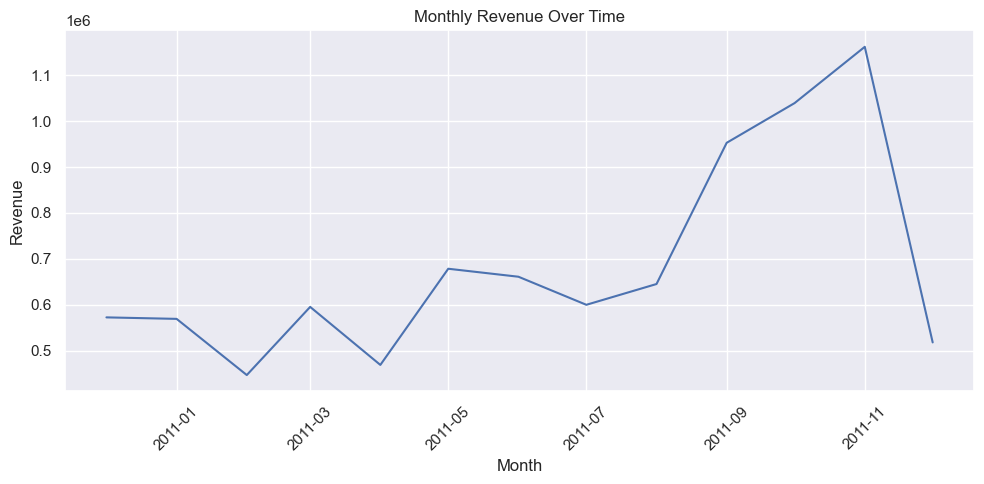

In [4]:
# Create a month column (year-month)
df["InvoiceMonth"] = df["InvoiceDate"].dt.to_period("M").dt.to_timestamp()

# Group by month and sum TotalPrice
monthly_revenue = df.groupby("InvoiceMonth")["TotalPrice"].sum().reset_index()

# Plot monthly revenue
plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue["InvoiceMonth"], monthly_revenue["TotalPrice"])
plt.title("Monthly Revenue Over Time")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()

# Save the chart as an image
plt.savefig("../images/monthly_revenue.png")

plt.show()


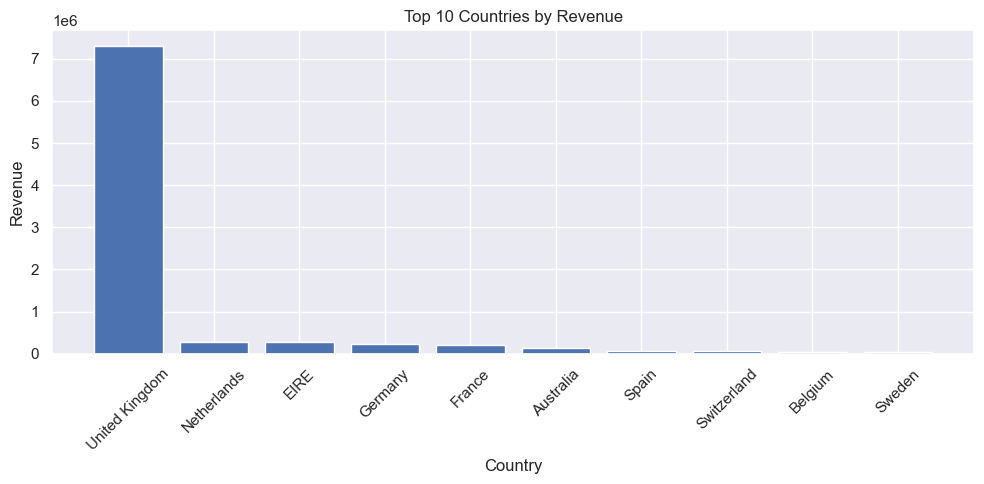

In [5]:
# Total revenue per country
country_revenue = (
    df.groupby("Country")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Take top 10 countries
top_countries = country_revenue.head(10)

# Plot top 10 countries
plt.figure(figsize=(10, 5))
plt.bar(top_countries["Country"], top_countries["TotalPrice"])
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()

# Save the chart
plt.savefig("../images/top_countries.png")

plt.show()
